<a href="https://colab.research.google.com/github/Eskdagoat/5105/blob/main/AndrewNicola_801136465_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-00174b2ece06>:22: RuntimeWarning: overflow encountered in square
  J = (1 / (2 * m)) * np.sum(errors**2)
<ipython-input-1-00174b2ece06>:38: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


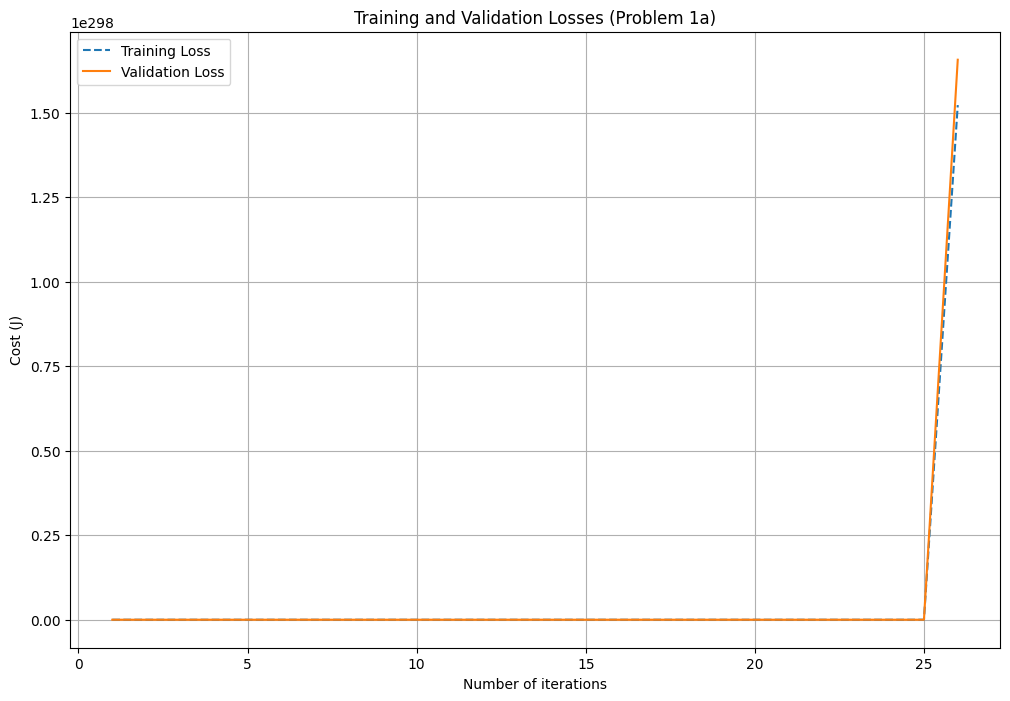

Final training loss (1a): nan
Final validation loss (1a): nan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)

# Extract the required features for 1a: area, bedrooms, bathrooms, stories, parking
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values

# Split the data into 70% training and 30% testing with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Cost function for linear regression (no regularization)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J

# Gradient descent for linear regression
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        # Gradient descent step for training
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradient = (1 / m_train) * X_train.T.dot(errors_train)

        # Update theta
        theta -= alpha * gradient

        # Compute training and validation losses
        cost_history_train[i] = compute_cost(X_train, y_train, theta)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

# Add a bias term (intercept) to X
def add_bias_term(X):
    m = X.shape[0]
    return np.hstack((np.ones((m, 1)), X))

# Add bias term
X_train = add_bias_term(X_train)
X_test = add_bias_term(X_test)

# Set hyperparameters
iterations = 1000
alpha = 0.01

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Perform gradient descent
theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(range(1, iterations + 1), cost_history_train, label='Training Loss', linestyle='--')
plt.plot(range(1, iterations + 1), cost_history_test, label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation Losses (Problem 1a)')
plt.grid(True)
plt.legend()
plt.show()

# Print final losses
print(f"Final training loss (1a): {cost_history_train[-1]}")
print(f"Final validation loss (1a): {cost_history_test[-1]}")


<ipython-input-8-96b894783315>:29: RuntimeWarning: overflow encountered in square
  J = (1 / (2 * m)) * np.sum(errors**2)
<ipython-input-8-96b894783315>:45: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


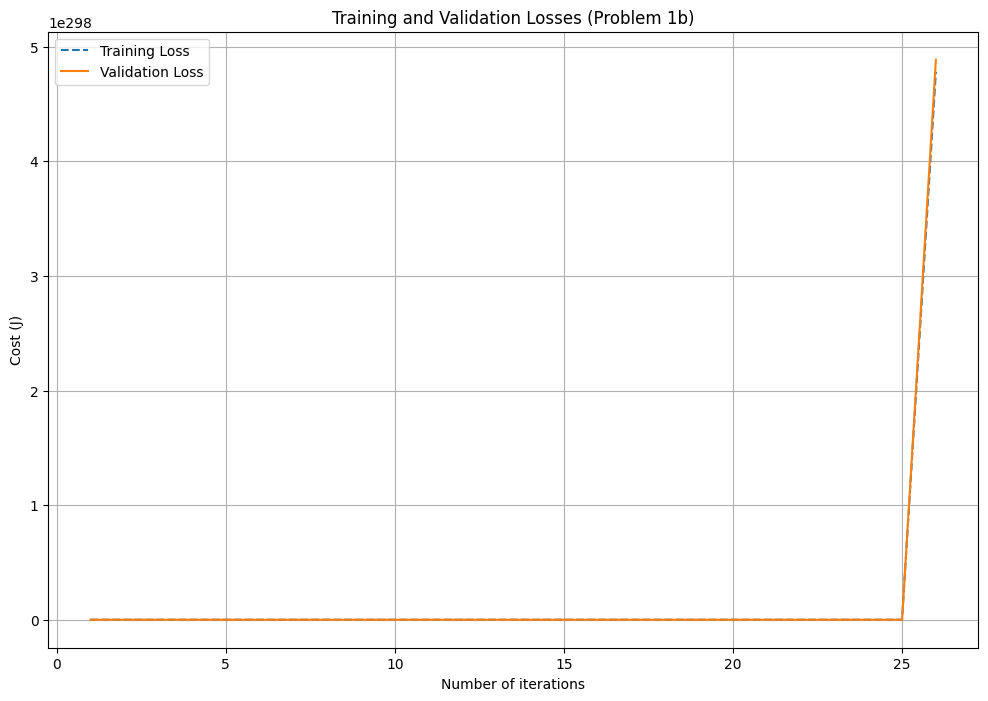

Final training loss (1b): nan
Final validation loss (1b): nan


In [9]:
# Convert categorical features to binary (0 and 1)
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# Extract the required features for 1b
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = df['price'].values

# Split the data into 70% training and 30% testing with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

# Add bias term
X_train = add_bias_term(X_train)
X_test = add_bias_term(X_test)

# Set hyperparameters
iterations = 1000
alpha = 0.01

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Perform gradient descent
theta, cost_history_train, cost_history_test = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(range(1, iterations + 1), cost_history_train, label='Training Loss', linestyle='--')
plt.plot(range(1, iterations + 1), cost_history_test, label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training and Validation Losses (Problem 1b)')
plt.grid(True)
plt.legend()
plt.show()

# Print final losses
print(f"Final training loss (1b): {cost_history_train[-1]}")
print(f"Final validation loss (1b): {cost_history_test[-1]}")


Processing Problem 2a with Standardization:


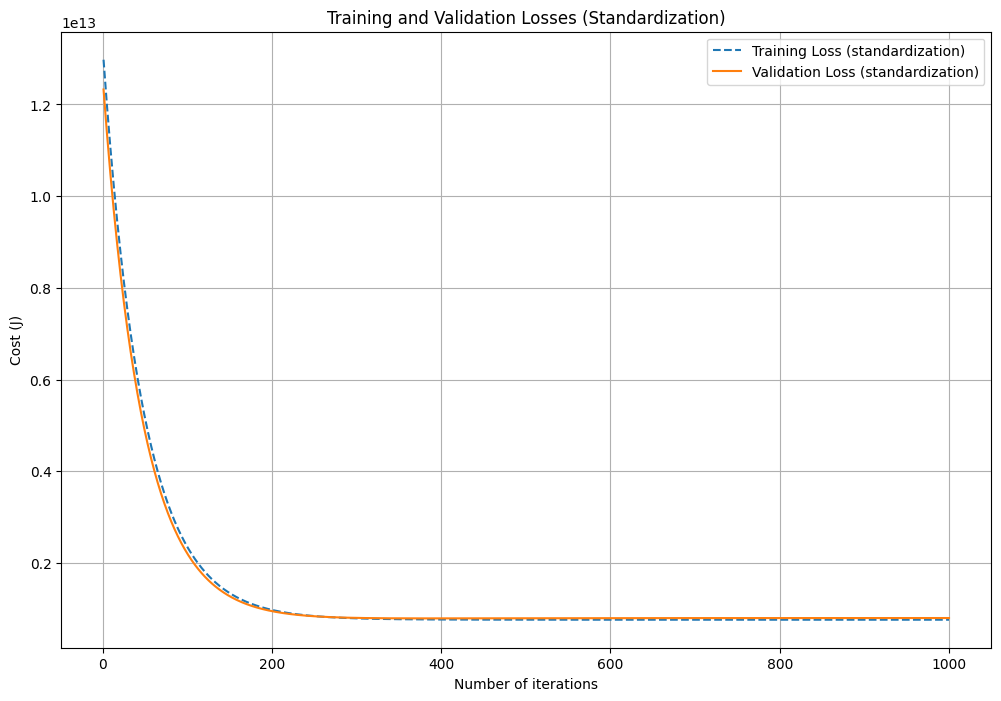

Final training loss (standardization): 761035282425.7019
Final validation loss (standardization): 798065687118.8304
Processing Problem 2a with Normalization:


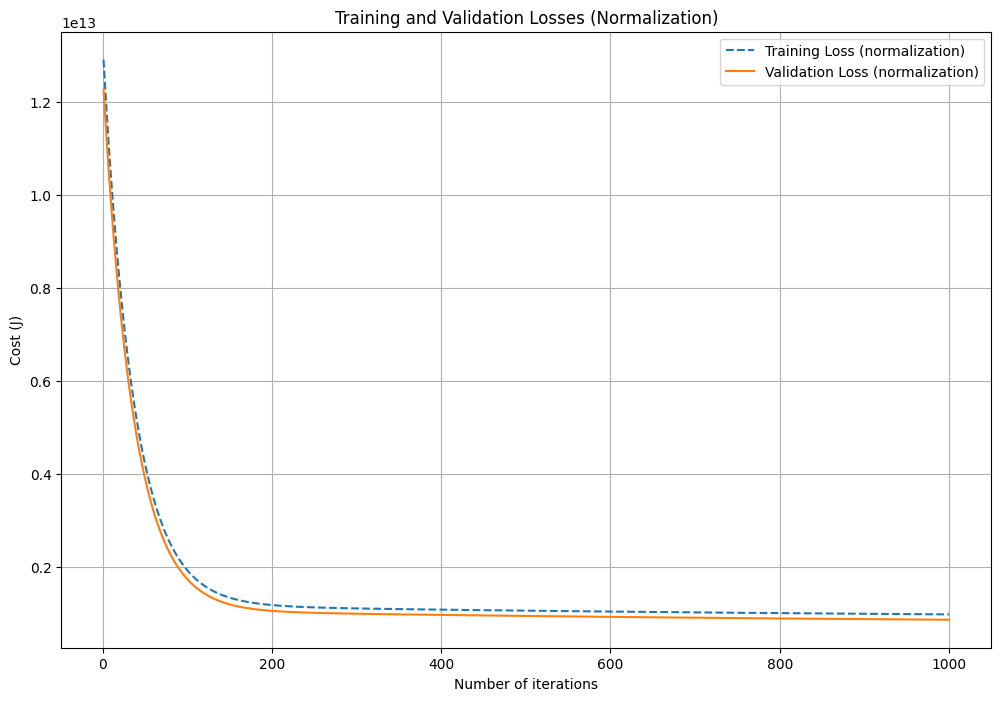

Final training loss (normalization): 974374490059.1072
Final validation loss (normalization): 859998125694.0326
Processing Problem 2b with Standardization:


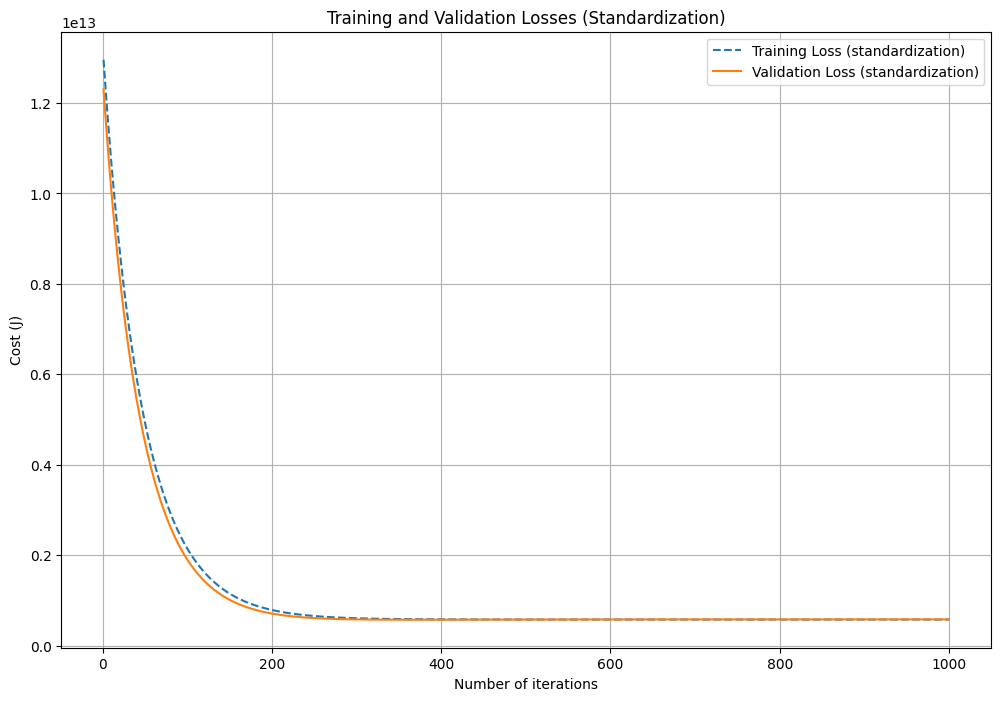

Final training loss (standardization): 574235800973.6825
Final validation loss (standardization): 578065891736.4583
Processing Problem 2b with Normalization:


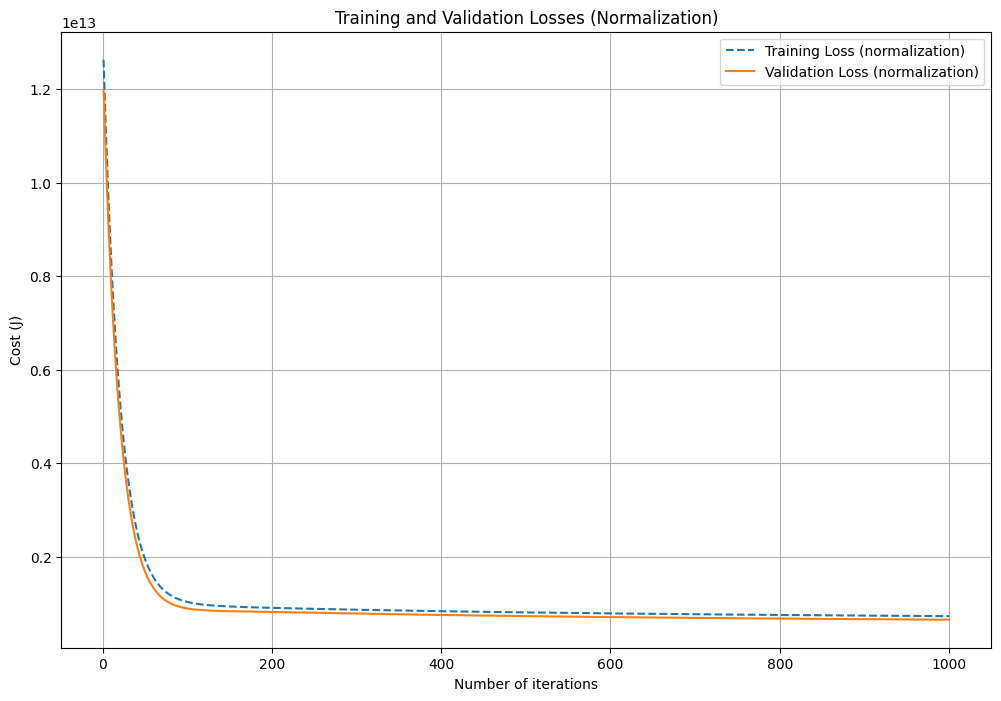

Final training loss (normalization): 728558792373.0065
Final validation loss (normalization): 651943599513.958


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)

# Convert categorical features to binary (0 and 1)
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# Add a bias term (intercept) to X
def add_bias_term(X):
    m = X.shape[0]
    return np.hstack((np.ones((m, 1)), X))

# Cost function for linear regression (no regularization for 2a and 2b)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J

# Gradient descent for linear regression (no regularization for 2a and 2b)
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m_train = len(y_train)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        # Gradient descent step for training
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradient = (1 / m_train) * X_train.T.dot(errors_train)

        # Update theta
        theta -= alpha * gradient

        # Compute training and validation losses
        cost_history_train[i] = compute_cost(X_train, y_train, theta)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

# Function to perform gradient descent with input scaling
def process_and_train(X, y, scaling_method='standardization'):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

    # Apply input scaling
    if scaling_method == 'normalization':
        scaler = MinMaxScaler()
    else:  # Default to standardization
        scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add bias term
    X_train_scaled = add_bias_term(X_train_scaled)
    X_test_scaled = add_bias_term(X_test_scaled)

    # Set hyperparameters
    iterations = 1000
    alpha = 0.01

    # Initialize theta
    theta = np.zeros(X_train_scaled.shape[1])

    # Perform gradient descent
    theta, cost_history_train, cost_history_test = gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, theta, alpha, iterations)

    # Plotting the results
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, iterations + 1), cost_history_train, label=f'Training Loss ({scaling_method})', linestyle='--')
    plt.plot(range(1, iterations + 1), cost_history_test, label=f'Validation Loss ({scaling_method})')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Training and Validation Losses ({scaling_method.capitalize()})')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Final training loss ({scaling_method}): {cost_history_train[-1]}")
    print(f"Final validation loss ({scaling_method}): {cost_history_test[-1]}")

# Problem 2a - Standardization
print("Processing Problem 2a with Standardization:")
X_2a = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values
process_and_train(X_2a, y, scaling_method='standardization')

# Problem 2a - Normalization
print("Processing Problem 2a with Normalization:")
process_and_train(X_2a, y, scaling_method='normalization')

# Problem 2b - Standardization
print("Processing Problem 2b with Standardization:")
X_2b = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
process_and_train(X_2b, y, scaling_method='standardization')

# Problem 2b - Normalization
print("Processing Problem 2b with Normalization:")
process_and_train(X_2b, y, scaling_method='normalization')

Processing Problem 3a with Regularization:


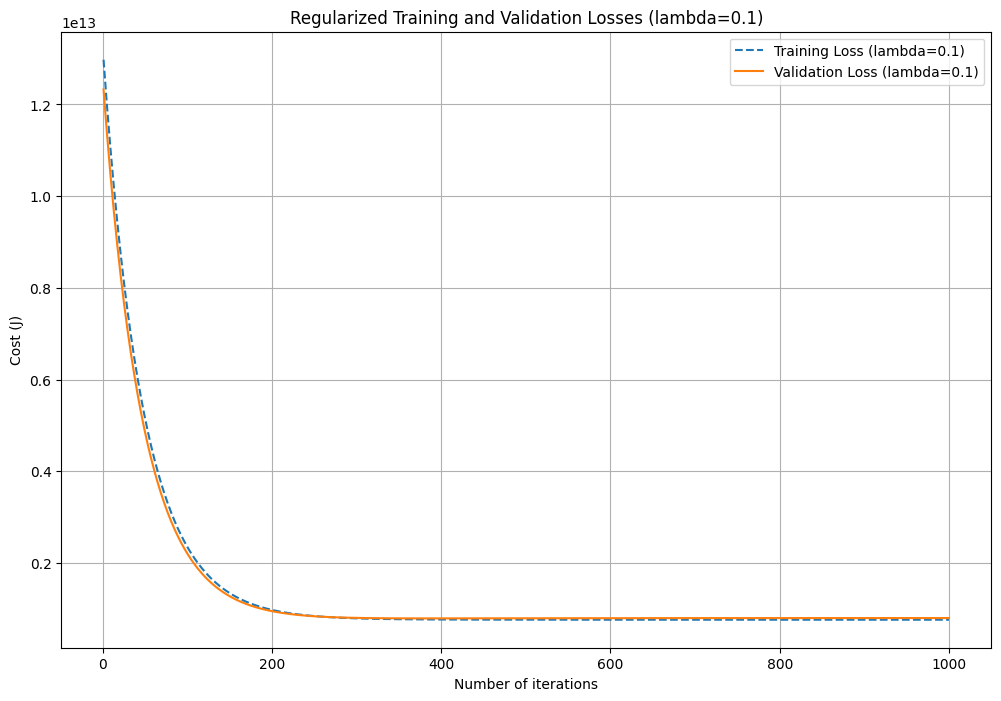

Final training loss (lambda=0.1): 761178378251.3988
Final validation loss (lambda=0.1): 798025778174.199
Processing Problem 3b with Regularization:


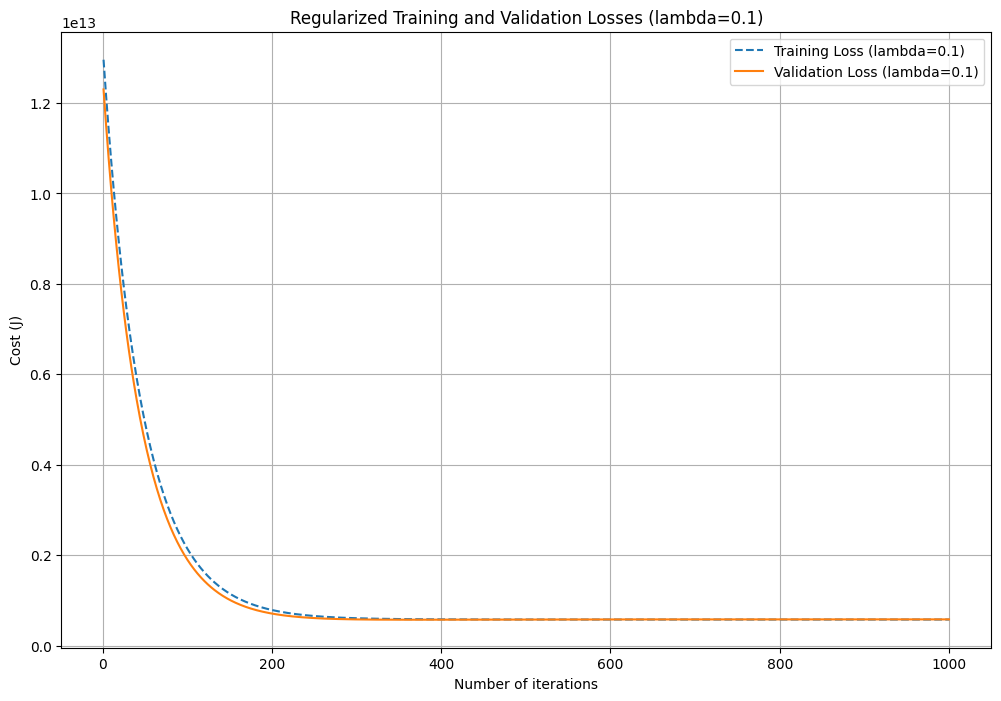

Final training loss (lambda=0.1): 574369091758.1968
Final validation loss (lambda=0.1): 578041204934.2229


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)

# Convert categorical features to binary (0 and 1)
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# Define the regularized cost function
def compute_cost_regularized(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Ignore the bias term (theta[0])
    J = (1 / (2 * m)) * np.sum(errors**2) + regularization_term
    return J

# Define the non-regularized cost function (used for validation)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J

# Regularized gradient descent function
def gradient_descent_regularized(X_train, y_train, X_test, y_test, theta, alpha, iterations, lambda_):
    m_train = len(y_train)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta)
        errors_train = predictions_train - y_train
        gradient = (1 / m_train) * X_train.T.dot(errors_train)

        # Regularization term
        regularization_term = (lambda_ / m_train) * np.hstack([[0], theta[1:]])
        theta -= alpha * (gradient + regularization_term)

        # Compute costs
        cost_history_train[i] = compute_cost_regularized(X_train, y_train, theta, lambda_)
        cost_history_test[i] = compute_cost(X_test, y_test, theta)

    return theta, cost_history_train, cost_history_test

# Add a bias term (intercept) to X
def add_bias_term(X):
    m = X.shape[0]
    return np.hstack((np.ones((m, 1)), X))

# Function to process data, standardize it, and apply regularized gradient descent
def process_and_train_regularized(X, y, lambda_):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add bias term after scaling
    X_train_scaled = add_bias_term(X_train_scaled)
    X_test_scaled = add_bias_term(X_test_scaled)

    # Set hyperparameters
    iterations = 1000
    alpha = 0.01

    # Initialize theta
    theta = np.zeros(X_train_scaled.shape[1])

    # Perform gradient descent with regularization
    theta, cost_history_train, cost_history_test = gradient_descent_regularized(
        X_train_scaled, y_train, X_test_scaled, y_test, theta, alpha, iterations, lambda_
    )

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, iterations + 1), cost_history_train, label=f'Training Loss (lambda={lambda_})', linestyle='--')
    plt.plot(range(1, iterations + 1), cost_history_test, label=f'Validation Loss (lambda={lambda_})')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Regularized Training and Validation Losses (lambda={lambda_})')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print final losses
    print(f"Final training loss (lambda={lambda_}): {cost_history_train[-1]}")
    print(f"Final validation loss (lambda={lambda_}): {cost_history_test[-1]}")

# Problem 3a: Using regularization with standardization
print("Processing Problem 3a with Regularization:")
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values
process_and_train_regularized(X, y, lambda_=0.1)

# Problem 3b: Using regularization with additional features
print("Processing Problem 3b with Regularization:")
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
process_and_train_regularized(X, y, lambda_=0.1)
